In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from scipy.stats import *
from keras import backend as K

In [2]:
def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]
    
def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]

def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm

In [3]:
def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+ filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    print('\n')
    f_pic.close()
    return tab_pics, info

In [4]:
'''
list par catégorie: caracteres speciaux/lettre ou digit
'''

path = '/Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/'
list_file_all = os.listdir(path)

list_special_caract=[]
list_letter = []
list_digit = []

for n in range(len(list_file_all)):
    if len(list_file_all[n]) >10:
        list_special_caract.append(list_file_all[n])
    else: 
        try:
            int(list_file_all[n][5])
            list_digit.append(list_file_all[n])
        except ValueError:
            list_letter.append(list_file_all[n])

Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_ENTER.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 13411


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_CTRL.bin
Nb pics par trame: 17
Frequence d'echantill

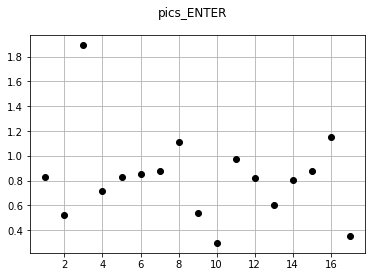

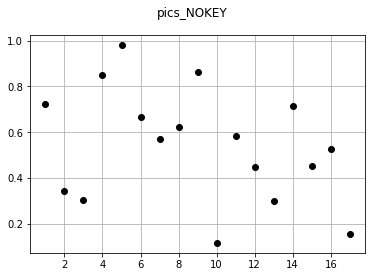

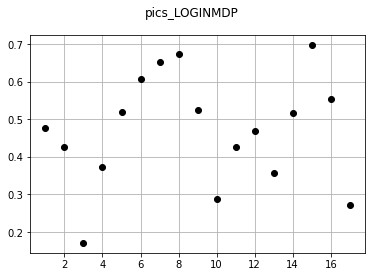

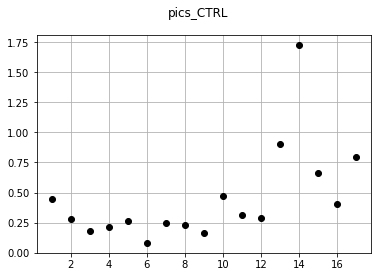

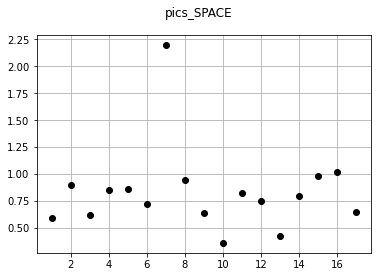

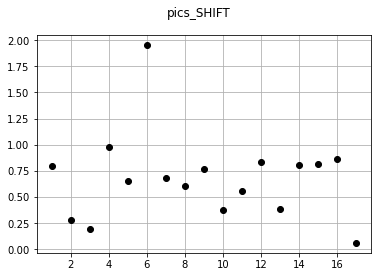

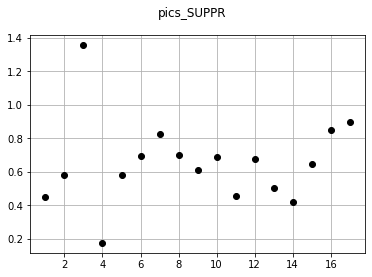

In [5]:
which_list = list_special_caract # choisir la liste voulue
num_sample = 0                   # choisir le num de l'échantillon

for i in range(len(which_list)):
    pic = which_list[i][ 0 : -4]
    fig, axs = plt.subplots(1)
    fig.suptitle(pic)
    
    pic, info = get_pics_from_file(path+which_list[i])
    axs.plot(range(1,info["nb_pics"]+1), pic[num_sample], 'ko')
    axs.grid(b=True, which='both')



In [6]:
'''
on crée toutes les variables: 
    pics_xx
    info_xx
    
exemple si lettre A:
    pics_J
    info_A
exemple si caractere spécial SPACE:
    pics_SPACE
    info_SPACE
'''
new = globals()
for i in range(len(list_file_all)):
    new[list_file_all[i][0:-4]], new['info_'+str(list_file_all[i][5:-4])] = get_pics_from_file(path+list_file_all[i])
    

Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_ENTER.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 13411


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonn

Nb trames: 8112


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_E.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7927


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_D.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7847


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_2.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8367


Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_S.bin
Nb pics par trame: 17
Frequence d'echantillonn

### on crée tous les df avec les col_name

In [7]:
list_df = ['df_'+x[0:-4] for x in list_special_caract ]
list_df

['df_pics_ENTER',
 'df_pics_NOKEY',
 'df_pics_LOGINMDP',
 'df_pics_CTRL',
 'df_pics_SPACE',
 'df_pics_SHIFT',
 'df_pics_SUPPR']

### Fonction de display boxplot des inputs

In [ ]:
''' A continuer
import pandas as pd

for i in range(len(list_df)):
    list_df = list_df[1]
    list_df = pd.DataFrame(eval(list_special_caract[i][0:-4]))
    
list_df   

col_name = [list_file_all[i][0:-4]+ str(x) for x in range(17)]
col_name
'''

In [8]:
def boxplot_touche(df, name):
    output=pd.DataFrame(df)
    output = output.unstack(level=-1)
    output = pd.DataFrame(output)
    output.reset_index(inplace=True)
    output.columns = ['pic','index_pic','amplitude']
    
    plt.figure(figsize=(15,4))
    plt.title(name, loc='center')
    sns.boxplot(x=output['pic'], y=output['amplitude'])
    plt.show()


#### Affichage des données de toutes les lettres

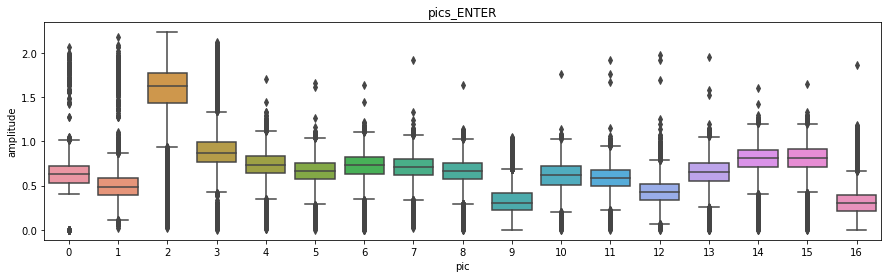

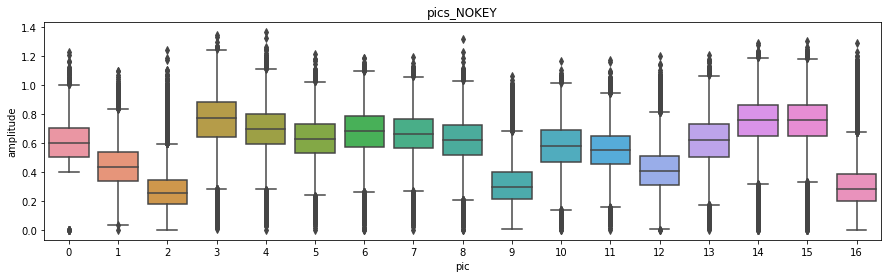

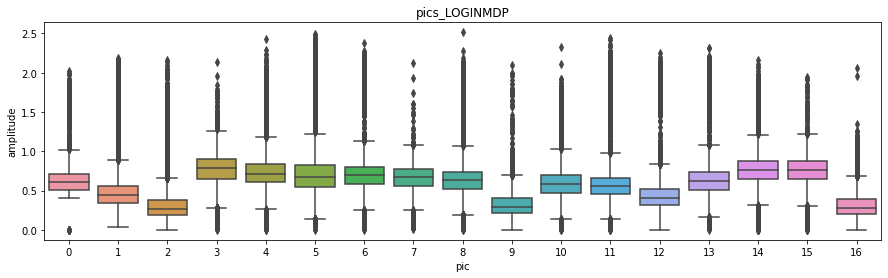

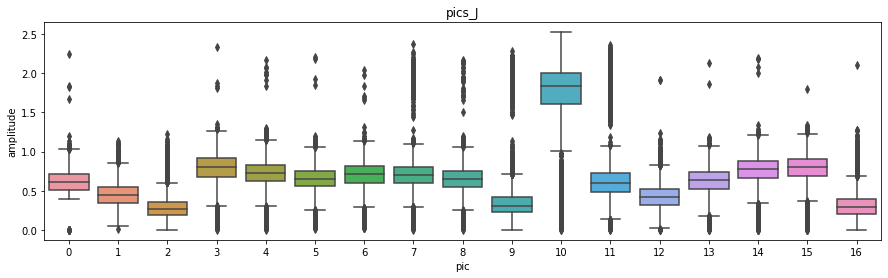

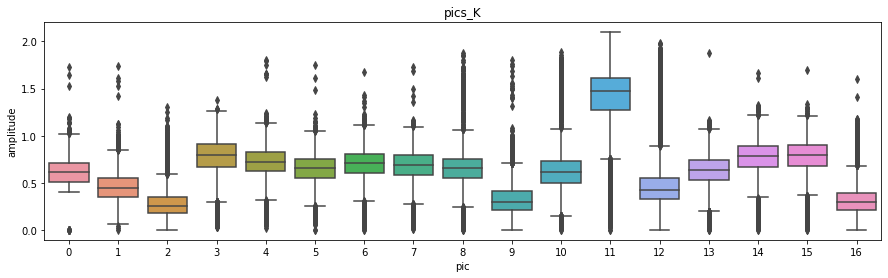

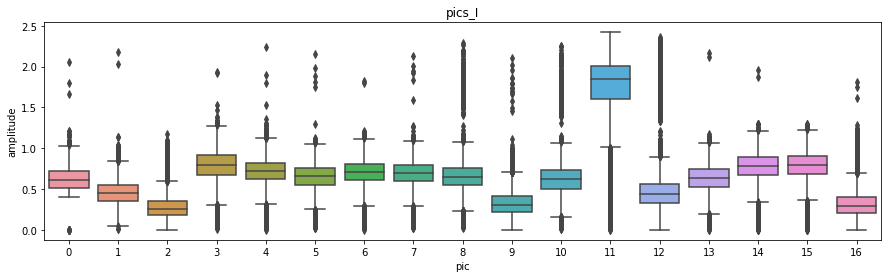

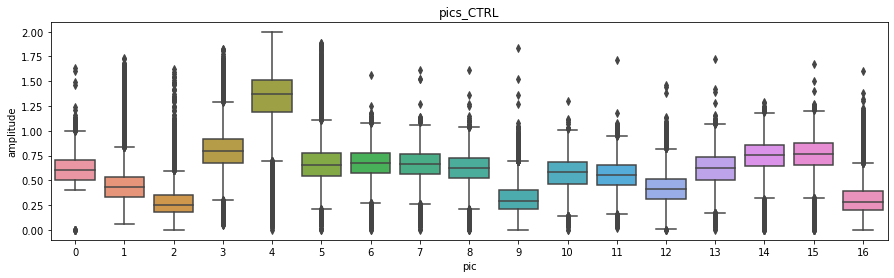

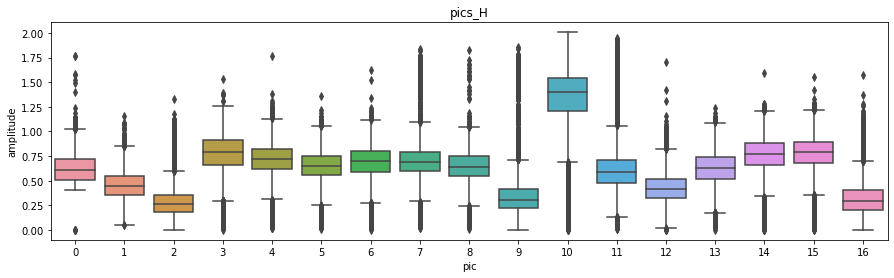

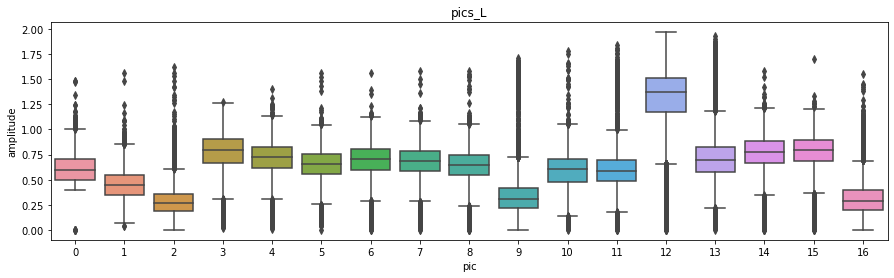

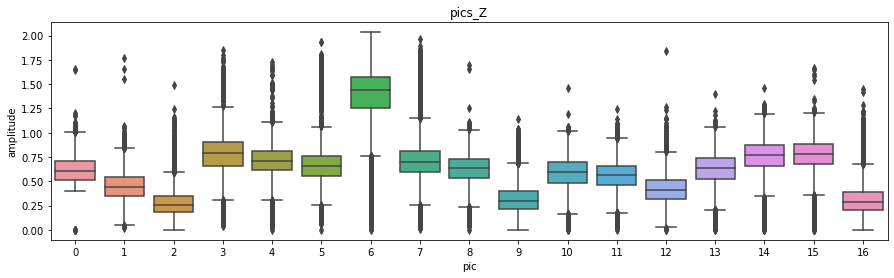

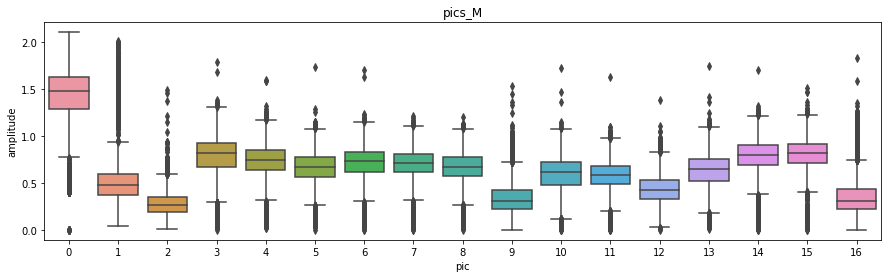

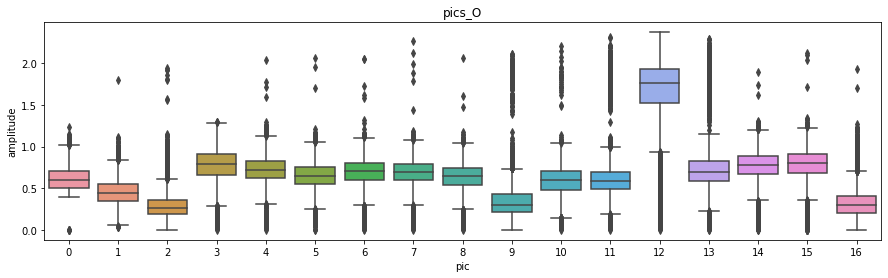

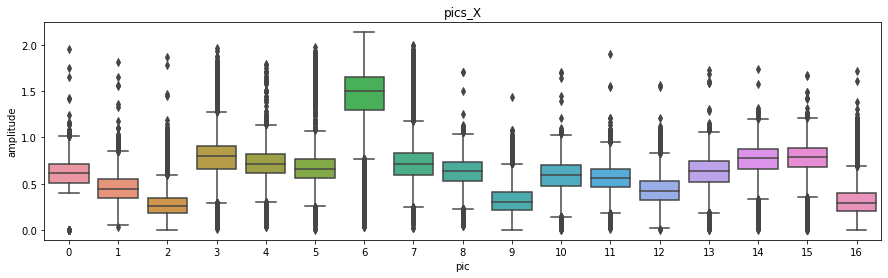

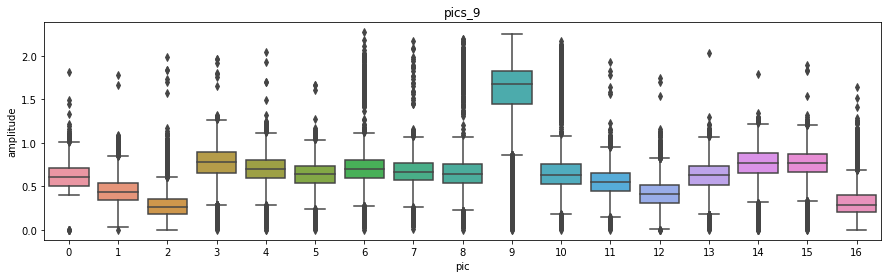

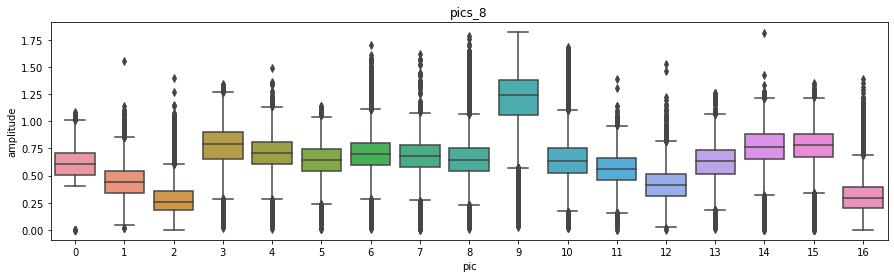

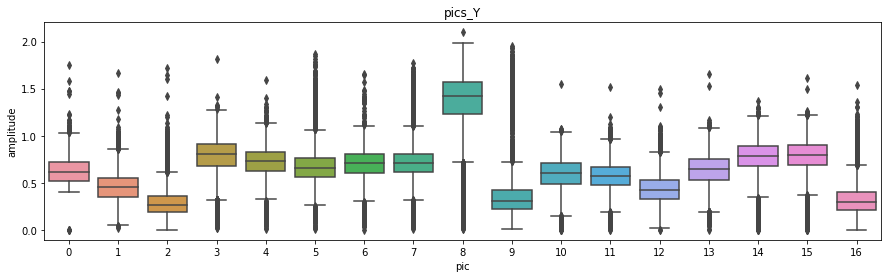

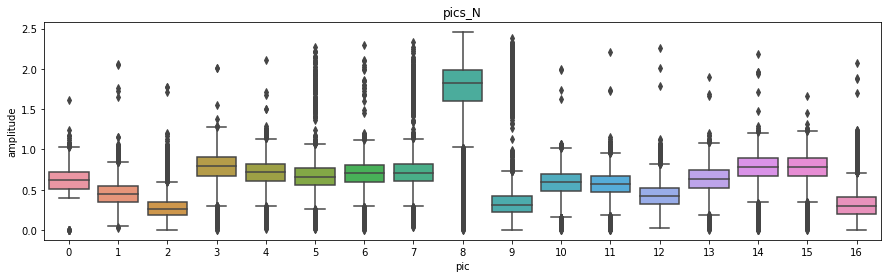

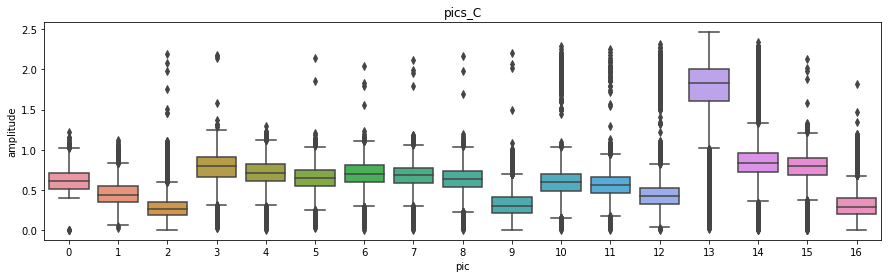

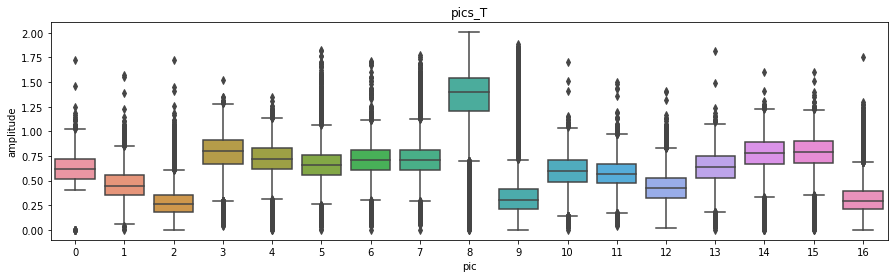

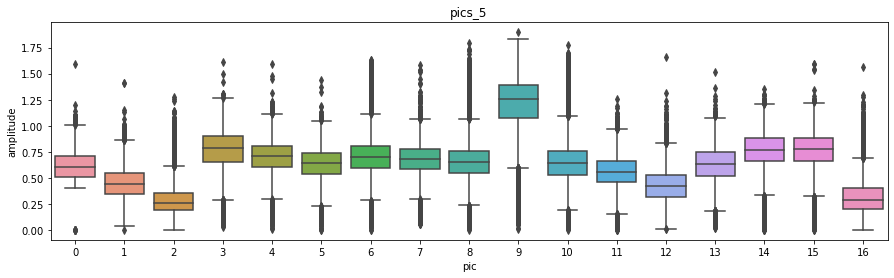

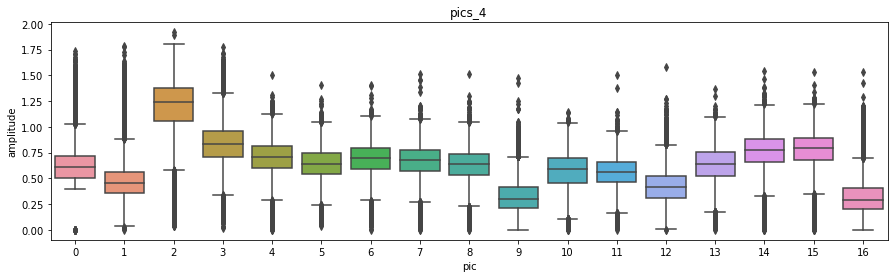

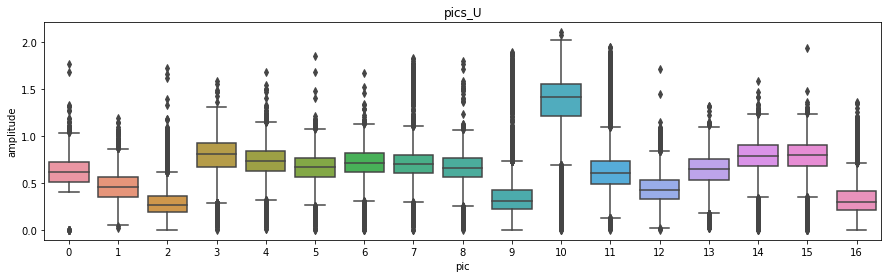

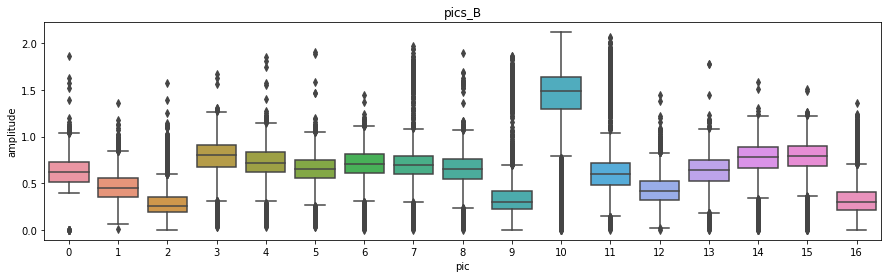

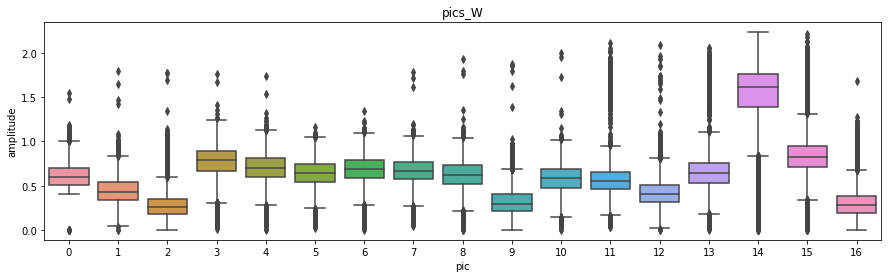

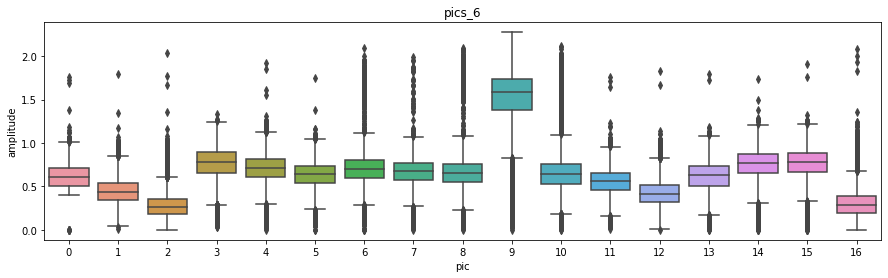

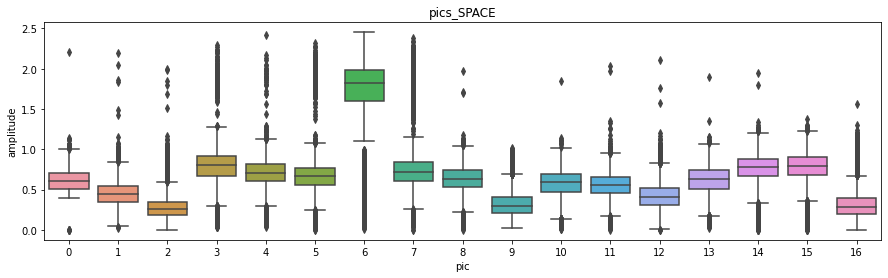

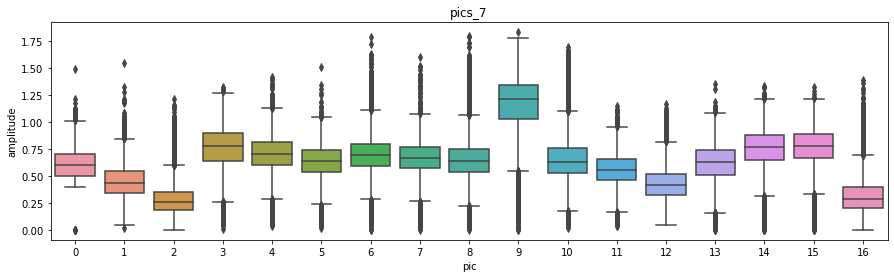

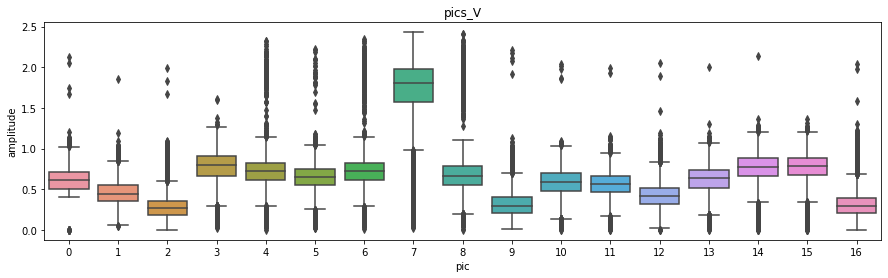

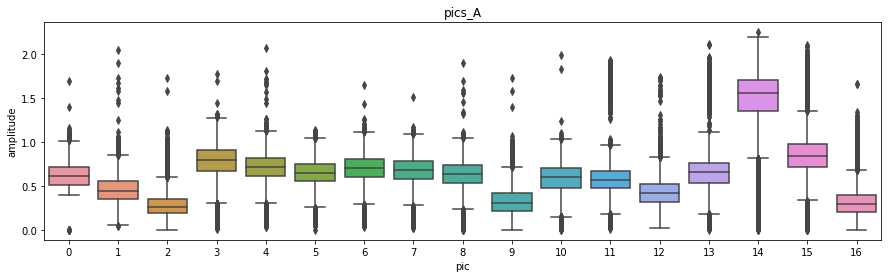

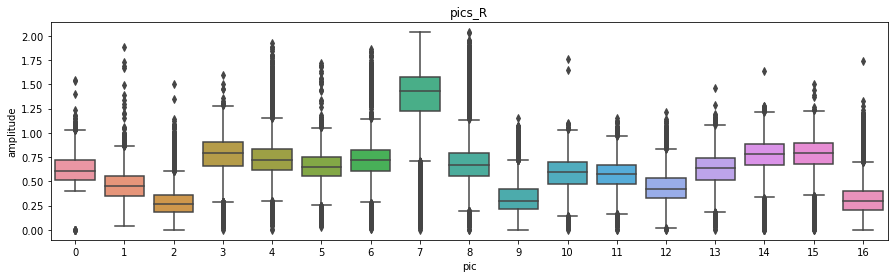

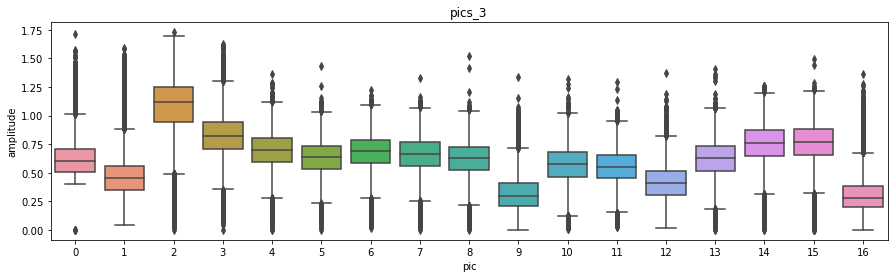

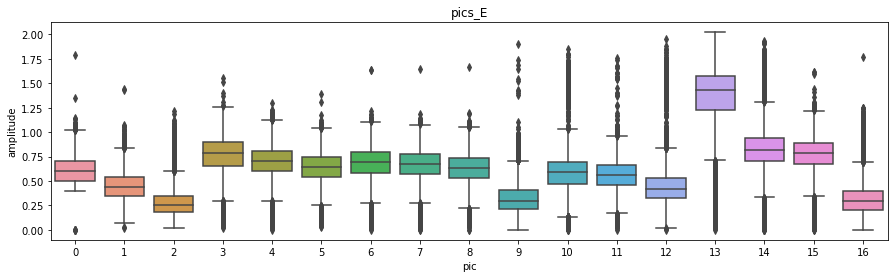

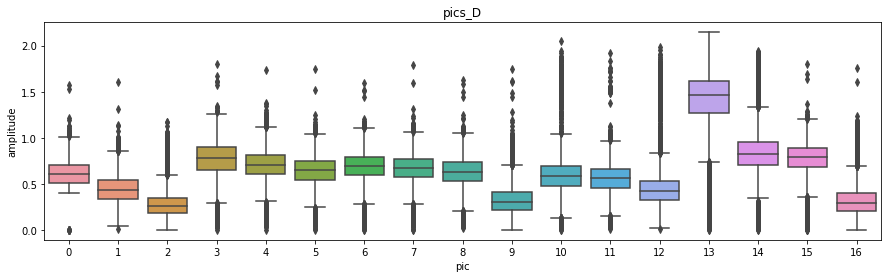

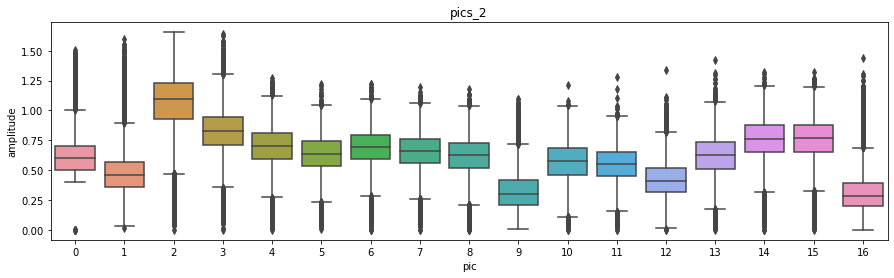

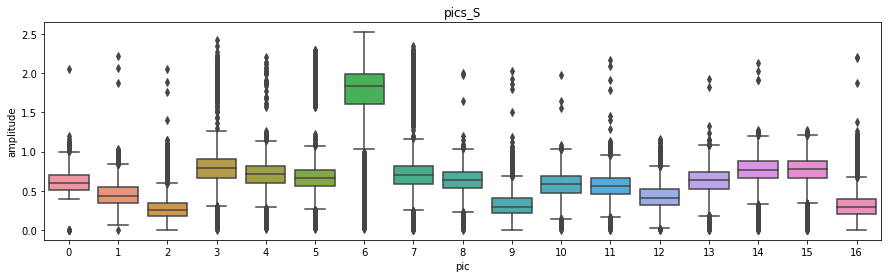

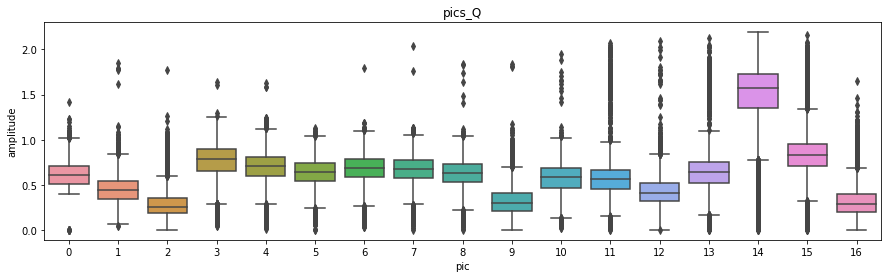

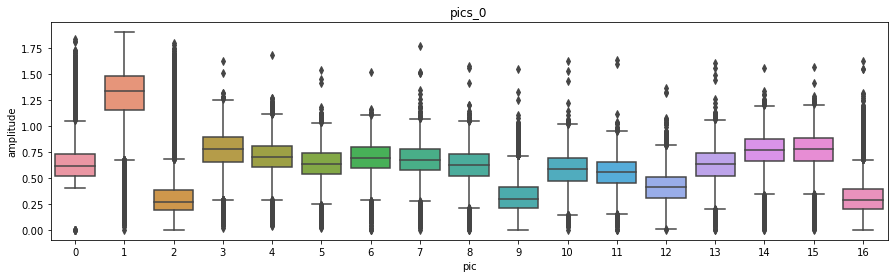

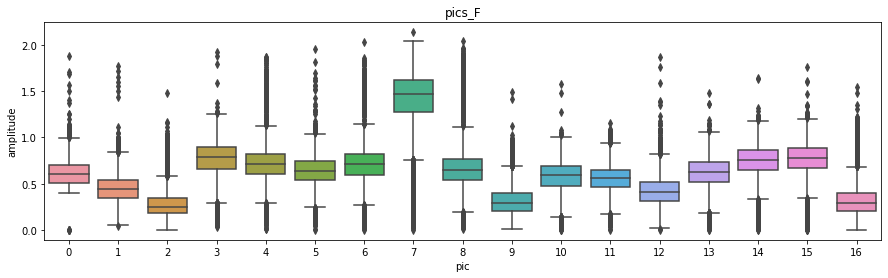

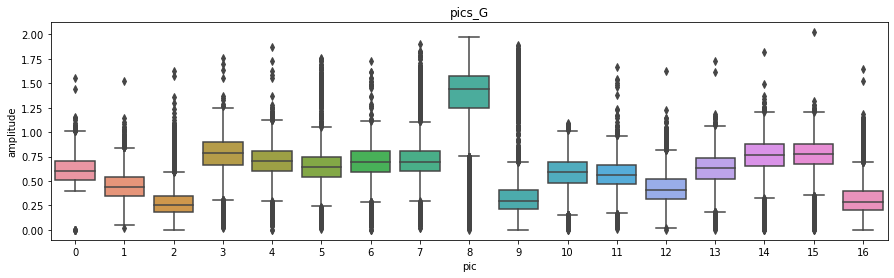

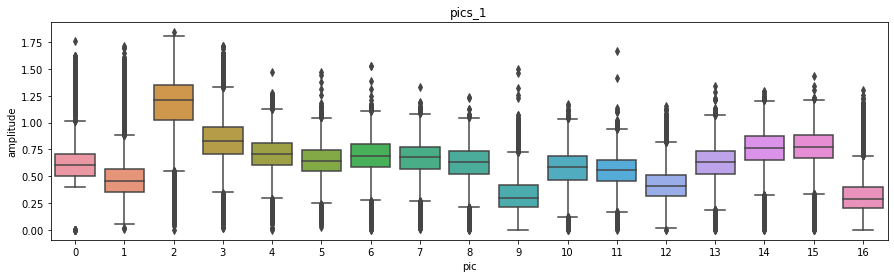

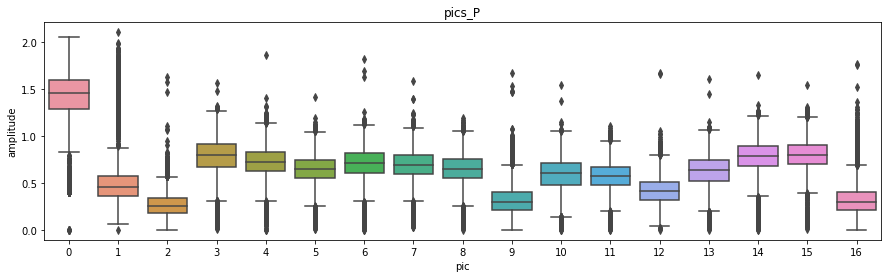

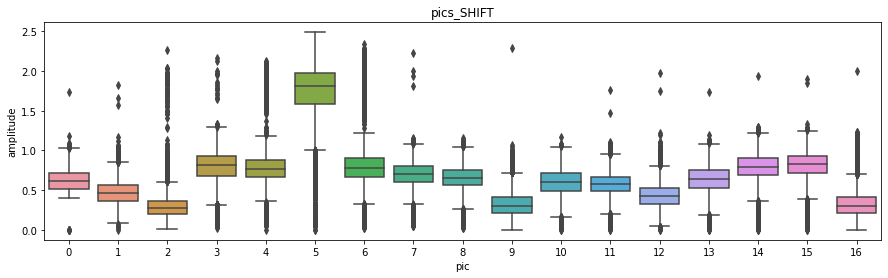

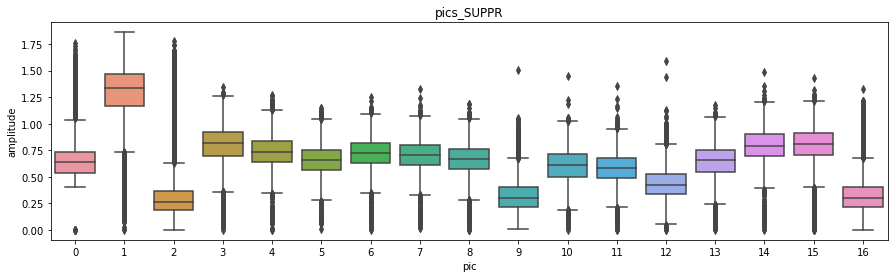

In [9]:
import pandas as pd
import seaborn as sns
for i in range(len(list_file_all)):
    boxplot_touche(vars()[list_file_all[i][0:-4]], list_file_all[i][0:-4])

#### si on veut en selectionner un spécifique

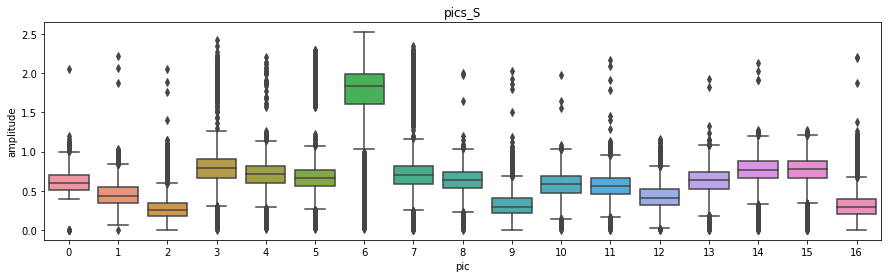

In [10]:
# pics_xx
boxplot_touche(pics_S, 'pics_S')

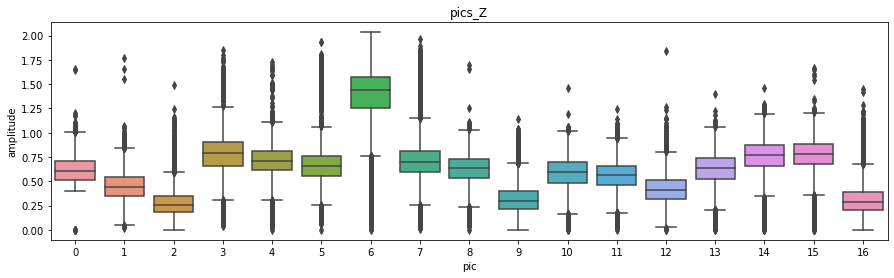

In [11]:
# pics_xx
boxplot_touche(pics_Z, 'pics_Z')

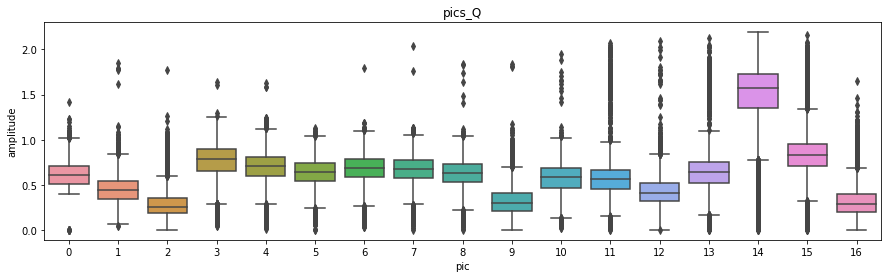

In [12]:
# pics_xx
boxplot_touche(pics_Q, 'pics_Q')

In [13]:
def feat_augmentation(data):

    data = np.array(data)
    trimmedmean = []

    for i in range(len(np.transpose(data))):
        trimmedmean.append(tmean(data[:,i]))

    all_metrics = np.concatenate((data.mean(axis=0),
                    #data.std(axis=0),
                    #kurtosis(data),
                    #moment(data,2),    # Calculate the nth moment about the mean for a sample.              
                    #moment(data,3),    # Calculate the nth moment about the mean for a sample.
                    #moment(data,4),    # Calculate the nth moment about the mean for a sample.
                    #moment(data,5),    # Calculate the nth moment about the mean for a sample.
                    #skew(data),        # Compute the sample skewness of a data set.
                    #tmax(data),        # Compute the trimmed maximum.
                    #tstd(data),        # Compute the trimmed std.
                    #variation(data),   # Compute the coefficient of variation.
                    #trim_mean(data,0.1), # Return mean of array after trimming distribution from both tails.
                    #iqr(data,axis=0)   #  Compute the interquartile range of the data along the specified axis
                   ))

    return all_metrics

#=> 17 metrics, 17 pics = 289 colonnes

### LOGINMDP

In [14]:
list_file_all_without_LOGINMDP= [x for x in list_file_all if x != 'pics_LOGINMDP.bin']

### Création d'un dico pour faire le lien entre les touches 

In [15]:
touche_clavier = []
for f in list_file_all_without_LOGINMDP: 
    f = f.replace('.bin', '').replace('pics_','')
    touche_clavier.append(f)

In [16]:
dico = {}
k=0
for i in touche_clavier:
    dico[i]=k
    k=k+1
dico

inv_dico = {v: k for k, v in dico.items()}

## Existe-il une proximité (correlation) entre les touches proches physiquement sur un clavier AZERTY

In [17]:
data = []
output = []
for i in list_file_all_without_LOGINMDP:
    print(i)
    data,_ = get_pics_from_file(path+i)
    output.append(feat_augmentation(data))
    data = []
    
X = pd.DataFrame(output)

pics_ENTER.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_ENTER.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 13411


pics_NOKEY.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802


pics_J.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7793


pics_K.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_K.bin
Nb

pics_3.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_3.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8112


pics_E.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_E.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7927


pics_D.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_D.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7847


pics_2.bin
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_2.bin
Nb pics par trame: 1

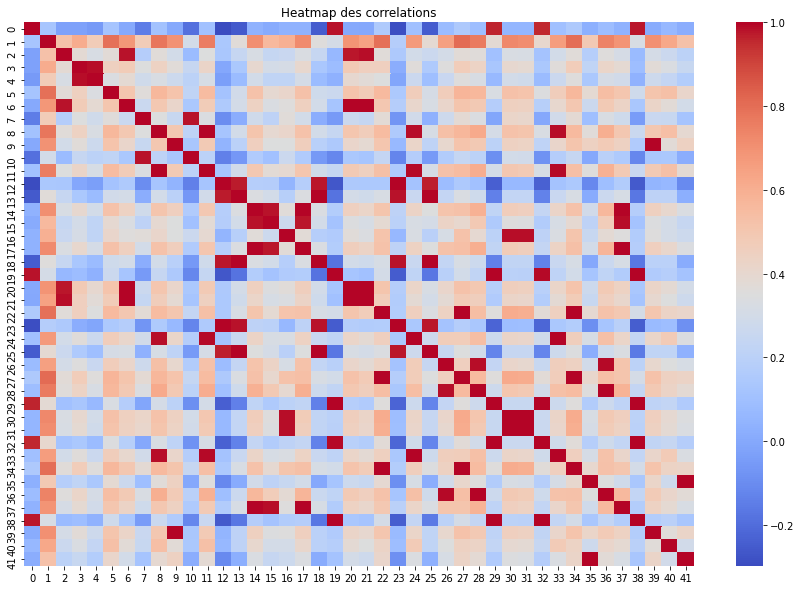

In [18]:
correlations = X.T.corr() 
fig_1 = plt.figure(figsize=(15,10))
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, cmap='coolwarm')
plt.title('Heatmap des correlations')
plt.show()

In [19]:
correlations = X.T.corr() 
correlations = correlations.rank(axis=1,method='dense', ascending=False)
correlations.iloc[0:,19:].head()

,19,20,21,22,23,24,25,26,27,28,...,32,33,34,35,36,37,38,39,40,41
0,2.0,31.0,32.0,6.0,41.0,13.0,38.0,17.0,7.0,15.0,...,5.0,14.0,8.0,25.0,16.0,23.0,3.0,27.0,18.0,26.0
1,38.0,16.0,22.0,5.0,40.0,19.0,33.0,21.0,2.0,7.0,...,32.0,20.0,3.0,29.0,9.0,17.0,37.0,14.0,23.0,28.0
2,41.0,4.0,2.0,11.0,35.0,24.0,27.0,22.0,7.0,12.0,...,37.0,25.0,9.0,33.0,13.0,20.0,40.0,21.0,26.0,32.0
3,39.0,4.0,9.0,8.0,40.0,23.0,33.0,25.0,6.0,12.0,...,34.0,24.0,7.0,32.0,14.0,18.0,38.0,21.0,27.0,30.0
4,39.0,4.0,6.0,9.0,40.0,24.0,33.0,26.0,7.0,12.0,...,36.0,25.0,8.0,32.0,15.0,19.0,38.0,22.0,27.0,31.0


### La plus forte corrélation entre les touches

In [20]:
correlations_1st_caract = correlations.replace(2.0, 50)
correlations_1st_caract["correl_1"] = correlations_1st_caract.idxmax(axis=1)
correlations_1st_caract["1ere_Plus_forte_correlation"] = correlations_1st_caract['correl_1'].apply(lambda x: inv_dico[x])
correlations_1st_caract = correlations_1st_caract.reset_index()
correlations_1st_caract["TOUCHE"] = correlations_1st_caract['index'].apply(lambda x: inv_dico[x])
correlations_1st_caract.iloc[:,19:].head()

,18,19,20,21,22,23,24,25,26,27,...,35,36,37,38,39,40,41,correl_1,1ere_Plus_forte_correlation,TOUCHE
0,39.0,50.0,31.0,32.0,6.0,41.0,13.0,38.0,17.0,7.0,...,25.0,16.0,23.0,3.0,27.0,18.0,26.0,19,4,ENTER
1,36.0,38.0,16.0,22.0,5.0,40.0,19.0,33.0,21.0,50.0,...,29.0,9.0,17.0,37.0,14.0,23.0,28.0,27,A,NOKEY
2,30.0,41.0,4.0,50.0,11.0,35.0,24.0,27.0,22.0,7.0,...,33.0,13.0,20.0,40.0,21.0,26.0,32.0,21,B,J
3,36.0,39.0,4.0,9.0,8.0,40.0,23.0,33.0,25.0,6.0,...,32.0,14.0,18.0,38.0,21.0,27.0,30.0,4,I,K
4,35.0,39.0,4.0,6.0,9.0,40.0,24.0,33.0,26.0,7.0,...,32.0,15.0,19.0,38.0,22.0,27.0,31.0,3,K,I


### La seconde plus forte corrélation entre les touches

In [21]:
correlations_2nd_caract = correlations.replace(3.0, 60)
correlations_2nd_caract["correl_2"] = correlations_2nd_caract.idxmax(axis=1)
correlations_2nd_caract["2ieme_Plus_forte_correlation"] = correlations_2nd_caract['correl_2'].apply(lambda x: inv_dico[x])
correlations_2nd_caract = correlations_2nd_caract.reset_index()
correlations_2nd_caract["TOUCHE"] = correlations_2nd_caract['index'].apply(lambda x: inv_dico[x])
correlations_2nd_caract.iloc[:,19:].head()

,18,19,20,21,22,23,24,25,26,27,...,35,36,37,38,39,40,41,correl_2,2ieme_Plus_forte_correlation,TOUCHE
0,39.0,2.0,31.0,32.0,6.0,41.0,13.0,38.0,17.0,7.0,...,25.0,16.0,23.0,60.0,27.0,18.0,26.0,38,1,ENTER
1,36.0,38.0,16.0,22.0,5.0,40.0,19.0,33.0,21.0,2.0,...,29.0,9.0,17.0,37.0,14.0,23.0,28.0,34,Q,NOKEY
2,30.0,41.0,4.0,2.0,11.0,35.0,24.0,27.0,22.0,7.0,...,33.0,13.0,20.0,40.0,21.0,26.0,32.0,6,H,J
3,36.0,39.0,4.0,9.0,8.0,40.0,23.0,33.0,25.0,6.0,...,32.0,14.0,18.0,38.0,21.0,27.0,30.0,1,NOKEY,K
4,35.0,39.0,4.0,6.0,9.0,40.0,24.0,33.0,26.0,7.0,...,32.0,15.0,19.0,38.0,22.0,27.0,31.0,1,NOKEY,I


### Tableau récapitulation des touches les plus correlées

In [23]:
proximite_touche = correlations_1st_caract.iloc[:,-3:]
proximite_to_add = correlations_2nd_caract.iloc[:,-2:-1]
proximite_touche = proximite_touche[['TOUCHE', '1ere_Plus_forte_correlation']]
proximite_touche_2_caract = pd.concat([proximite_touche, proximite_to_add], axis=1)
proximite_touche_2_caract.iloc[21:]

,TOUCHE,1ere_Plus_forte_correlation,2ieme_Plus_forte_correlation
21,B,H,U
22,W,Q,A
23,6,9,5
24,SPACE,S,X
25,7,8,5
26,V,F,R
27,A,Q,W
28,R,F,V
29,3,2,1
30,E,D,C


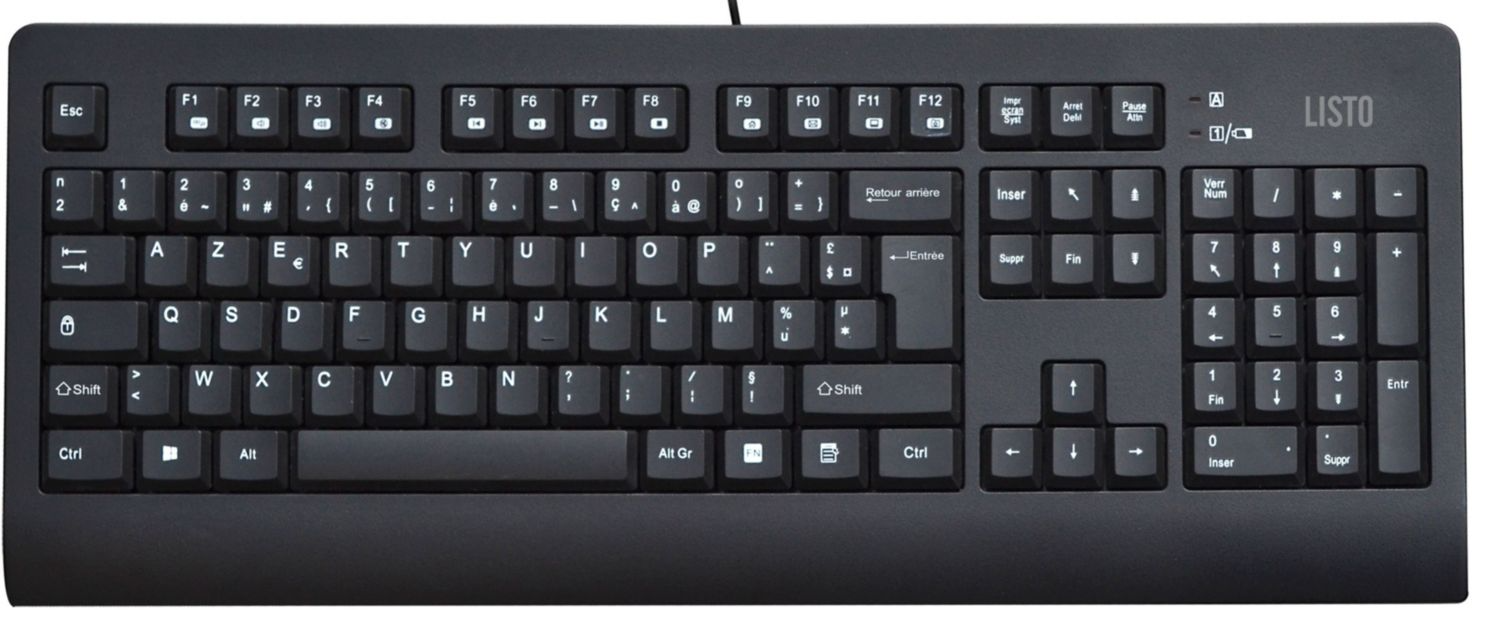

In [50]:
from IPython.display import display, Image
display(Image(filename='clavier.png'))


## Génération des X et Y pour les prédictions

In [ ]:
y = pd.DataFrame(touche_clavier)
y.columns = ['label']

In [24]:

df_X = pd.DataFrame(np.zeros(17)).unstack()
df_X = df_X.unstack()

df_Y = pd.DataFrame()
nb_row=0

for i in range(len(list_file_all_without_LOGINMDP)):
    data,_ = get_pics_from_file(path+list_file_all_without_LOGINMDP[i])
    # construction du dataframe X
    df_data = pd.DataFrame(data)
    df_X = df_X.append(df_data)
    nb_row +=df_data.shape[0]
    
    #onstruction du dataframe Y 
    Y_to_add = pd.DataFrame(np.empty((len(df_data), 1)))
    Y_to_add[0] = i
    df_Y = df_Y.append(Y_to_add)
    del Y_to_add
    
    
df_X = df_X.reset_index(drop=True)
df_X.drop(df_X.index[:1], inplace=True)

df_Y = df_Y.reset_index(drop=True)

Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_ENTER.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 13411


i=============> 0
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802


i=============> 1
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7793


i=============> 2
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_K.bin


i=============> 28
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_3.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8112


i=============> 29
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_E.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7927


i=============> 30
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data/pics_D.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7847


i=============> 31
Ouverture du fichier de pics /Users/Lingli/Documents/Lingli/Telecom-Paris/Hackaton_Armee/Hackaton/data

In [26]:
df_LOGINMDP = pd.DataFrame(pics_LOGINMDP)

### Random Forest, multiclasses 

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=200, n_jobs = -1)
result = clf_rf.fit(df_X,df_Y.values.ravel()).predict_proba(df_LOGINMDP)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state= 42, shuffle= True)

X_train = X_train.reset_index(drop=True,inplace=False)
X_test  = X_test.reset_index(drop=True,inplace=False)

Y_train = pd.DataFrame(Y_train).reset_index(drop=True,inplace=False)
Y_test = pd.DataFrame(Y_test).reset_index(drop=True,inplace=False)

In [51]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(clf_rf, X_train, Y_train.values.ravel(), cv= 5)
mean_score = np.mean(scores)
print('le mean_score:', mean_score)

le mean_score: 0.5645794946322812


In [43]:
LOGINMDP_predict = pd.DataFrame(result.copy())
LOGINMDP_predict.iloc[0:,0:]

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.005,0.940,0.000,0.000,0.00,0.005,0.005,0.00,0.005,0.000,...,0.005,0.005,0.005,0.000,0.000,0.005,0.000,0.000,0.000,0.005
1,0.010,0.125,0.000,0.000,0.01,0.120,0.020,0.02,0.005,0.000,...,0.015,0.040,0.070,0.015,0.040,0.015,0.025,0.000,0.005,0.015
2,0.000,0.935,0.000,0.000,0.00,0.005,0.000,0.00,0.005,0.005,...,0.005,0.000,0.005,0.000,0.005,0.010,0.000,0.000,0.000,0.000
3,0.000,0.990,0.000,0.000,0.00,0.005,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000
4,0.005,0.755,0.000,0.000,0.01,0.015,0.005,0.01,0.010,0.005,...,0.055,0.000,0.015,0.005,0.005,0.000,0.005,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,0.000,0.980,0.000,0.000,0.00,0.015,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11097,0.000,0.990,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11098,0.000,0.950,0.005,0.005,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11099,0.000,1.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [44]:
LOGINMDP_predict["prediction"] = LOGINMDP_predict.idxmax(axis=1)
LOGINMDP_predict

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,prediction
0,0.005,0.940,0.000,0.000,0.00,0.005,0.005,0.00,0.005,0.000,...,0.005,0.005,0.000,0.000,0.005,0.000,0.000,0.000,0.005,1
1,0.010,0.125,0.000,0.000,0.01,0.120,0.020,0.02,0.005,0.000,...,0.040,0.070,0.015,0.040,0.015,0.025,0.000,0.005,0.015,1
2,0.000,0.935,0.000,0.000,0.00,0.005,0.000,0.00,0.005,0.005,...,0.000,0.005,0.000,0.005,0.010,0.000,0.000,0.000,0.000,1
3,0.000,0.990,0.000,0.000,0.00,0.005,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,1
4,0.005,0.755,0.000,0.000,0.01,0.015,0.005,0.01,0.010,0.005,...,0.000,0.015,0.005,0.005,0.000,0.005,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,0.000,0.980,0.000,0.000,0.00,0.015,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
11097,0.000,0.990,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
11098,0.000,0.950,0.005,0.005,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
11099,0.000,1.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [45]:
LOGINMDP_predict["1ere_Plus_forte_correlation"] = LOGINMDP_predict['prediction'].apply(lambda x: inv_dico[x])
LOGINMDP_predict.iloc[0:,19:].head()

,19,20,21,22,23,24,25,26,27,28,...,34,35,36,37,38,39,40,41,prediction,1ere_Plus_forte_correlation
0,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.005,0.000,...,0.005,0.000,0.000,0.005,0.000,0.000,0.000,0.005,1,NOKEY
1,0.02,0.01,0.01,0.010,0.000,0.01,0.090,0.025,0.005,0.050,...,0.070,0.015,0.040,0.015,0.025,0.000,0.005,0.015,1,NOKEY
2,0.00,0.00,0.00,0.000,0.000,0.00,0.005,0.000,0.000,0.005,...,0.005,0.000,0.005,0.010,0.000,0.000,0.000,0.000,1,NOKEY
3,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,1,NOKEY
4,0.02,0.00,0.00,0.005,0.005,0.00,0.015,0.005,0.000,0.000,...,0.015,0.005,0.005,0.000,0.005,0.000,0.000,0.000,1,NOKEY


In [46]:
final_RF = LOGINMDP_predict['1ere_Plus_forte_correlation']
final_RF

0        NOKEY
1        NOKEY
2        NOKEY
3        NOKEY
4        NOKEY
         ...  
11096    NOKEY
11097    NOKEY
11098    NOKEY
11099    NOKEY
11100    NOKEY
Name: 1ere_Plus_forte_correlation, Length: 11101, dtype: object

### Résultat

In [42]:
pd.DataFrame(final_RF.value_counts())

,1ere_Plus_forte_correlation
NOKEY,6446
SHIFT,1593
CTRL,394
SUPPR,297
4,184
2,155
0,154
W,139
K,129
T,127


Les résultats nous semblent cohérents. Il y a beaucoup de NOKEY. En effet, si l'utilisation met plus de 3ms, nous pensons qu'il y a autant de NOKEY que de temps de plus de 3ms écoulés entre les différentes touches tapées. 

Malheureusement, nous aurions aimé tester un RNN avec des couches LSTM car nous pensons qu'il faut respecter le pattern (pic) pour detecter la touche. Que l'ordre des pics à une importante. 